In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("furkanima/worldwide-travel-cities-ratings-and-climate")

print("Path to dataset files:", path)

100%|██████████| 114k/114k [00:00<00:00, 37.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/furkanima/worldwide-travel-cities-ratings-and-climate/versions/1


In [ ]:
import pandas as pd
import numpy as np
import ast
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler

In [ ]:
path = "/root/.cache/kagglehub/datasets/furkanima/worldwide-travel-cities-ratings-and-climate/versions/1/Worldwide Travel Cities Dataset (Ratings and Climate).csv"
df = pd.read_csv(path)


In [ ]:
print(df.head())
print(df.shape)
print(df.info())

                                     id            city    country  \
0  c54acf38-3029-496b-8c7a-8343ad82785c           Milan      Italy   
1  0bd12654-ed64-424e-a044-7bc574bcf078  Yasawa Islands       Fiji   
2  73036cda-9134-46fc-a2c6-807782d59dfb        Whistler     Canada   
3  3872c9c0-6b6e-49e1-9743-f46bfe591b86      Guanajuato     Mexico   
4  e1ebc1b6-8798-422d-847a-22016faff3fd        Surabaya  Indonesia   

          region                                  short_description  \
0         europe  Chic streets lined with fashion boutiques, his...   
1        oceania  Crystal-clear waters, secluded beaches, and vi...   
2  north_america  Snow-capped peaks and lush forests create a se...   
3  north_america  Winding cobblestone streets and colorful facad...   
4           asia  Bustling streets filled with the aroma of loca...   

    latitude   longitude                                   avg_temp_monthly  \
0  45.464194    9.189635  {"1":{"avg":3.7,"max":7.8,"min":0.4},"2":{"avg.

In [ ]:
print(df["budget_level"].unique())
print(df["ideal_durations"].head())
print(df["region"].unique())

['Luxury' 'Mid-range' 'Budget']
0              ["Short trip","One week"]
1               ["Long trip","One week"]
2    ["Short trip","Weekend","One week"]
3    ["Weekend","One week","Short trip"]
4               ["Short trip","Weekend"]
Name: ideal_durations, dtype: object
['europe' 'oceania' 'north_america' 'asia' 'africa' 'middle_east'
 'south_america']


In [ ]:
df[["culture","adventure","nature","beaches","nightlife","cuisine","wellness","urban","seclusion"]].describe()


,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
count,560.00000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,3.85000,3.178571,3.728571,2.380357,3.019643,3.792857,3.073214,3.146429,3.028571
std,0.81291,0.798190,0.903920,1.435547,0.921599,0.679329,0.592134,1.018604,0.989699
min,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,3.00000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000
50%,4.00000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
print(df.describe(include="all").T)

# Check categorical unique values
print("Budget levels:", df["budget_level"].unique())
print("Regions:", df["region"].unique())
print("Sample durations:", df["ideal_durations"].iloc[0])

                   count unique  \
id                   560    560   
city                 560    559   
country              560    167   
region               560      7   
short_description    560    560   
latitude           560.0    NaN   
longitude          560.0    NaN   
avg_temp_monthly     560    545   
ideal_durations      560     21   
budget_level         560      3   
culture            560.0    NaN   
adventure          560.0    NaN   
nature             560.0    NaN   
beaches            560.0    NaN   
nightlife          560.0    NaN   
cuisine            560.0    NaN   
wellness           560.0    NaN   
urban              560.0    NaN   
seclusion          560.0    NaN   

                                                                 top freq  \
id                              44aaa492-d7a7-43bb-a9bf-4f0ecc209def    1   
city                                                         Granada    2   
country                                                United States

In [ ]:
# Parse avg_temp_monthly (stringified dict → Python dict)
df["avg_temp_monthly"] = df["avg_temp_monthly"].apply(lambda x: ast.literal_eval(x))

# Create a single avg_temp feature
df["avg_temp"] = df["avg_temp_monthly"].apply(lambda x: np.mean([m["avg"] for m in x.values()]))

# Parse ideal_durations (list in string format)
df["ideal_durations"] = df["ideal_durations"].apply(lambda x: ast.literal_eval(x))

# Multi-hot encode ideal_durations
mlb = MultiLabelBinarizer()
durations_encoded = mlb.fit_transform(df["ideal_durations"])
durations_df = pd.DataFrame(durations_encoded, columns=[f"duration_{d}" for d in mlb.classes_])
df = df.join(durations_df)

In [ ]:
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,...,cuisine,wellness,urban,seclusion,avg_temp,duration_Day trip,duration_Long trip,duration_One week,duration_Short trip,duration_Weekend
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{'1': {'avg': 3.7, 'max': 7.8, 'min': 0.4}, '2...","[Short trip, One week]",Luxury,...,5,3,5,2,14.750000,0,0,1,1,0
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{'1': {'avg': 28, 'max': 30.8, 'min': 25.8}, '...","[Long trip, One week]",Luxury,...,3,4,1,5,26.975000,0,1,1,0,0
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{'1': {'avg': -2.5, 'max': 0.4, 'min': -5.5}, ...","[Short trip, Weekend, One week]",Luxury,...,3,4,2,4,6.808333,0,0,1,1,1
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{'1': {'avg': 15.5, 'max': 22.8, 'min': 8.7}, ...","[Weekend, One week, Short trip]",Mid-range,...,4,3,4,2,19.533333,0,0,1,1,1
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{'1': {'avg': 28.1, 'max': 32.5, 'min': 25.5},...","[Short trip, Weekend]",Budget,...,4,3,4,2,28.758333,0,0,0,1,1


In [ ]:
# Encode budget_level (Luxury / Mid-range / Budget → numeric)
le_budget = LabelEncoder()
df["budget_level_enc"] = le_budget.fit_transform(df["budget_level"])
print("Budget encoding:", dict(zip(le_budget.classes_, le_budget.transform(le_budget.classes_))))

Budget encoding: {'Budget': np.int64(0), 'Luxury': np.int64(1), 'Mid-range': np.int64(2)}


In [ ]:
feature_cols = [
    "budget_level_enc","culture","adventure","nature","beaches","nightlife",
    "cuisine","wellness","urban","seclusion","avg_temp"
] + list(durations_df.columns)

X = df[feature_cols].values

# Scale features for similarity scoring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix shape:", X_scaled.shape)

Feature matrix shape: (560, 16)


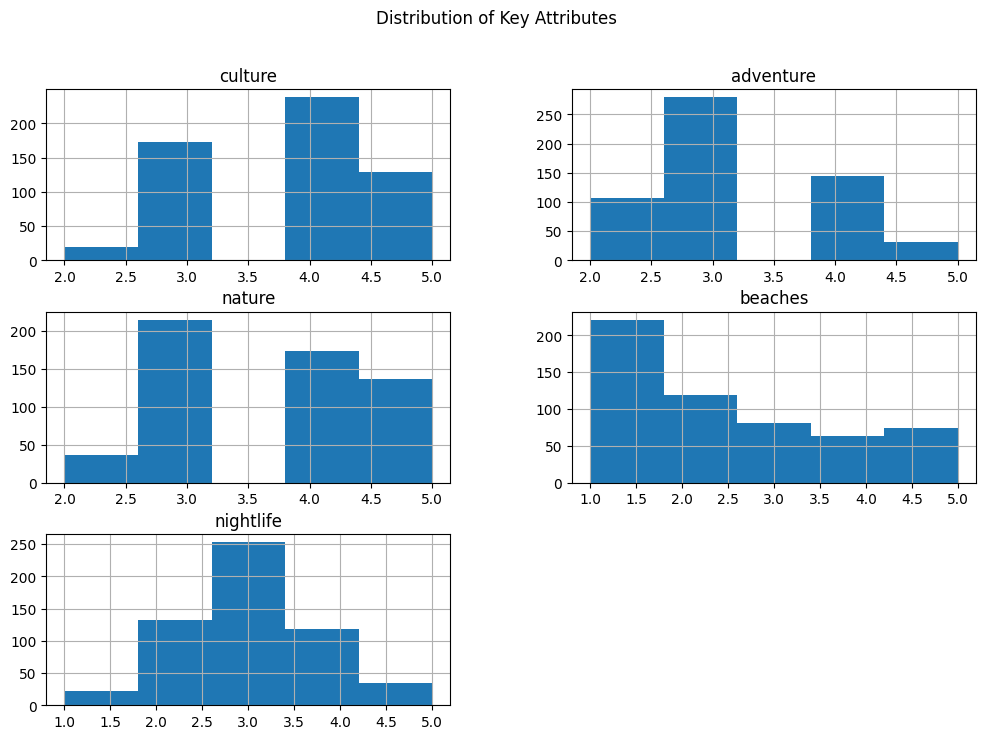

In [ ]:
df[["culture","adventure","nature","beaches","nightlife"]].hist(bins=5, figsize=(12,8))
plt.suptitle("Distribution of Key Attributes")
plt.show()

In [ ]:
artifacts = {
    "X": X_scaled,  # feature matrix
    "scaler": scaler,
    "cities": df[["city","country","region","short_description"]],
    "features": feature_cols,
    "budget_encoder": le_budget,
    "duration_encoder": mlb
}

with open("travel_recommender.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("Saved travel_recommender.pkl")

Saved travel_recommender.pkl


In [ ]:
# Testing the cosine similarity model
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load back the pickle file
with open("travel_recommender.pkl", "rb") as f:
    artifacts = pickle.load(f)

X = artifacts["X"]
scaler = artifacts["scaler"]
cities = artifacts["cities"]
budget_encoder = artifacts["budget_encoder"]
duration_encoder = artifacts["duration_encoder"]
features = artifacts["features"]

In [ ]:
# Ex. user preference
user_pref = {
    "budget_level": "Luxury",
    "culture": 5,
    "adventure": 3,
    "nature": 0,
    "beaches": 4,
    "nightlife": 0,
    "cuisine": 0,
    "wellness": 0,
    "urban": 0,
    "seclusion": 0,
    "avg_temp": 20,  # placeholder, e.g. mild weather
    "ideal_durations": ["One week"]
}



In [ ]:
# Encode budget_level
budget_val = budget_encoder.transform([user_pref["budget_level"]])[0]

# Encode ideal_durations (multi-hot)
duration_vec = duration_encoder.transform([user_pref["ideal_durations"]])[0]

# Build feature vector in correct order
user_vec = [
    budget_val,
    user_pref["culture"], user_pref["adventure"], user_pref["nature"],
    user_pref["beaches"], user_pref["nightlife"], user_pref["cuisine"],
    user_pref["wellness"], user_pref["urban"], user_pref["seclusion"],
    user_pref["avg_temp"]
] + list(duration_vec)

# Scale the vector
user_vec_scaled = scaler.transform([user_vec])

In [ ]:
# Compute cosine similarity
sims = cosine_similarity(user_vec_scaled, X)[0]

# Get top 5 recommendations
top_idx = np.argsort(sims)[::-1][:5]

# Show results
recommendations = cities.iloc[top_idx].copy()
recommendations["score"] = sims[top_idx]
recommendations

,city,country,region,short_description,score
466,Funafuti,Tuvalu,oceania,"Gentle sea breezes, vibrant sunsets, and the r...",0.600328
452,Rapa Nui,Chile,south_america,Mystical landscapes dotted with iconic stone s...,0.548594
257,Honiara,Solomon Islands,oceania,Lush tropical landscapes meet vibrant local ma...,0.541934
348,Kairouan,Tunisia,africa,"Wandering through ancient medinas, the air fil...",0.520064
130,Beira,Mozambique,africa,Warm ocean breezes mix with the vibrant energy...,0.515824


In [ ]:
# testing with user input for region preference
user_pref1 = {
    "budget_level": "Luxury",
    "culture": 5,
    "adventure": 3,
    "nature": 0,
    "beaches": 4,
    "nightlife": 0,
    "cuisine": 0,
    "wellness": 0,
    "urban": 0,
    "seclusion": 0,
    "avg_temp": 20,  # e.g., prefers mild climate
    "ideal_durations": ["One week"],
    "region": "Europe"   # set to None if no region filtering
}

In [ ]:
# Encode budget
budget_val = budget_encoder.transform([user_pref["budget_level"]])[0]

# Encode durations
duration_vec = duration_encoder.transform([user_pref["ideal_durations"]])[0]

# Build vector
user_vec = [
    budget_val,
    user_pref["culture"], user_pref["adventure"], user_pref["nature"],
    user_pref["beaches"], user_pref["nightlife"], user_pref["cuisine"],
    user_pref["wellness"], user_pref["urban"], user_pref["seclusion"],
    user_pref["avg_temp"]
] + list(duration_vec)

# Scale vector
user_vec_scaled = scaler.transform([user_vec])

In [ ]:
if user_pref1["region"]:
    mask = cities["region"].str.lower() == user_pref1["region"].lower()
    X_sub = X[mask]
    cities_sub = cities[mask]
else:
    X_sub = X
    cities_sub = cities

print("Cities considered:", cities_sub.shape[0])

Cities considered: 177


In [ ]:
# Cosine similarity
sims = cosine_similarity(user_vec_scaled, X_sub)[0]

# Top N results
N = 5
top_idx = np.argsort(sims)[::-1][:N]

recommendations = cities_sub.iloc[top_idx].copy()
recommendations["score"] = sims[top_idx]
recommendations

,city,country,region,short_description,score
191,Svalbard,Norway,europe,"Vast, icy landscapes and the ethereal glow of ...",0.425248
84,San Marino,San Marino,europe,"Perched atop rolling hills, this charming encl...",0.414342
70,Skopje,North Macedonia,europe,"Wandering through eclectic streets, you'll enc...",0.414195
298,Pristina,Kosovo,europe,"A city where vibrant street life, intriguing h...",0.395859
253,Gjirokastër,Albania,europe,Winding cobblestone streets and stone-roofed h...,0.369359
